In [1]:
import pandas as pd
import datetime
import calendar
import numpy
import sys
sys.path.append('/Users/fionafei/Desktop/Chicago/WIN22/Linear and Non-Linear Models/Sample Code')
import Regression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, norm
from sklearn.metrics import r2_score
from scipy.stats import shapiro, anderson
from sklearn.ensemble import RandomForestRegressor
import shap

## Questions 1

In [2]:
df = pd.read_excel('WeightDiary.xlsx')
df.head()

,Date,Weight
0,2017-03-04,209.7
1,2017-03-04,212.4
2,2017-03-05,210.0
3,2017-03-05,214.3
4,2017-03-06,209.1


In [3]:
df['Month'] = df['Date'].dt.month.apply(lambda x: calendar.month_name[x])
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Weight,Month,DayOfWeek
0,2017-03-04,209.7,March,Saturday
1,2017-03-04,212.4,March,Saturday
2,2017-03-05,210.0,March,Sunday
3,2017-03-05,214.3,March,Sunday
4,2017-03-06,209.1,March,Monday


#### (a)	(5 points). Provide a frequency table for the Month, and another frequency table for the DayOfWeek.

In [4]:
Month_Freq = pd.crosstab(index=df['Month'], columns='count')
Month_Freq

col_0,count
Month,
April,112
August,72
December,90
February,56
January,60
July,82
June,98
March,115
May,105


In [5]:
DayOfWeek_Freq = pd.crosstab(index=df['DayOfWeek'], columns='count')
DayOfWeek_Freq

col_0,count
DayOfWeek,
Friday,145
Monday,148
Saturday,146
Sunday,147
Thursday,154
Tuesday,153
Wednesday,151


### (b)	(5 points). What is the Residual Sum of Squares for this model Weight ~ Intercept?  Give your answer using the “.7E” scientific notation.

In [6]:
# Set some options for printing all the columns
numpy.set_printoptions(precision = 7, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('precision', 10)

pd.options.display.float_format = '{:,.7e}'.format

In [7]:
# Reorder the categories of Month in ascending order of frequencies of the target field
u  = df['Month'].astype('category')
pm = u.cat.reorder_categories(['January','February','March','April','May','June','July','August','September','October','November','December'])

# Reorder the categories for DayOfWeek in ascending order of frequencies of the target field
u1  = df['DayOfWeek'].astype('category')
pm1 = u1.cat.reorder_categories(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [8]:
# Model is Weight = Intercept

X_Month = pd.get_dummies(pd.DataFrame(pm))
X_Day = pd.get_dummies(pd.DataFrame(pm1))


X = X_Month.copy()
X.insert(0, 'Intercept', 1)
X = pd.DataFrame(X['Intercept'])

y = df['Weight']

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)

print('Residual Sum of Squares = ', residual_SS)


Residual Sum of Squares =  22360.229501910508


### (c)	(5 points). What is the Residual Sum of Squares for this model Weight ~ Intercept + Month?   Give your answer using the “.7E” scientific notation.

In [9]:
# Model is Weight = Intercept + Month

X1 = X_Month.copy()
X1.insert(0, 'Intercept', 1)
param_name = X_Month.columns

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X1, y)
print('Residual Sum of Squares = ', residual_SS)


Residual Sum of Squares =  17776.054171965658


### (d)	(5 points). What is the Residual Sum of Squares for this model Weight ~ Intercept + DayOfWeek?    Give your answer using the “.7E” scientific notation.

In [10]:
# Model is Weight = Intercept + DayOfWeek

X2 = X_Day.copy()
X2.insert(0, 'Intercept', 1)
param_name = X2.columns

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X2, y)
print('Residual Sum of Squares = ', residual_SS)

Residual Sum of Squares =  22239.170445416967


### (e)	(5 points). What is the generalized inverse that the SWEEP Operator gives for this model Weight ~ Intercept + DayOfWeek?    Give your answer using the “.7E” scientific notation.

In [11]:
#SWEEP Operator Generalized Inverse

X3 = X_Day.copy(deep=True)
X3.insert(0,'Intercept', 1) 
param_name = X3.columns

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X3, y)
beta = pd.Series(b, index = param_name)

print('Generalized Inverse of XtX')
print(XtX_Ginv)

Generalized Inverse of XtX
[[ 0.0068027 -0.0068027 -0.0068027 -0.0068027 -0.0068027 -0.0068027 -0.0068027  0.       ]
 [-0.0068027  0.0135595  0.0068027  0.0068027  0.0068027  0.0068027  0.0068027  0.       ]
 [-0.0068027  0.0068027  0.0133387  0.0068027  0.0068027  0.0068027  0.0068027  0.       ]
 [-0.0068027  0.0068027  0.0068027  0.0134252  0.0068027  0.0068027  0.0068027  0.       ]
 [-0.0068027  0.0068027  0.0068027  0.0068027  0.0132962  0.0068027  0.0068027  0.       ]
 [-0.0068027  0.0068027  0.0068027  0.0068027  0.0068027  0.0136993  0.0068027  0.       ]
 [-0.0068027  0.0068027  0.0068027  0.0068027  0.0068027  0.0068027  0.013652   0.       ]
 [ 0.         0.         0.         0.         0.         0.         0.         0.       ]]


### (f)	(5 points). What is the Residual Sum of Squares for this model Weight ~ Intercept + Month + DayOfWeek?    Give your answer using the “.7E” scientific notation.

In [12]:
# Model is Weight = Intercept + Month + DayOfWeek
X4 = X_Month.copy()
X4 = X4.join(X_Day.copy())
X4.insert(0,'Intercept', 1) 
param_name = X4.columns

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X4, y)
beta = pd.Series(b, index = param_name)
print('Residual Sum of Squares = ', residual_SS)

Residual Sum of Squares =  17665.565952563928


### (g)	(5 points). Which model yields the smallest Residual Sum of Squares?

Based on the result from compareing the value of residual sum of squares, we can see that the smallest residual sum of squares is 17665.565952563928, and the model is Weight = Intercept + Month + DayOfWeek

### (h)	(5 points). How many regression parameters (including the aliased parameters) are in this model Weight ~ Intercept + Month + DayOfWeek?

In [13]:
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X4, y)
print('Number of Aliased Parameter', len(param_name[aliasParam]))
print('Number of Non-Aliased Parameter', len(param_name[nonAliasParam]))

Number of Aliased Parameter 2
Number of Non-Aliased Parameter 18


### (i)	(10 points). What are the regression coefficients (including the aliased parameters) of this model Weight ~ Intercept + Month + DayOfWeek?    Give your answer using the “.7E” scientific notation.

In [14]:
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X4, y)

beta = pd.Series(b, index = param_name)
print('Parameter Estimates')
print(beta)

Parameter Estimates
Intercept              2.1162201e+02
Month_January         -4.4054252e+00
Month_February        -4.8239659e+00
Month_March           -2.8253761e+00
Month_April           -4.2731582e+00
Month_May             -6.4393219e+00
Month_June            -7.1583571e+00
Month_July            -7.1115251e+00
Month_August          -4.8223766e+00
Month_September       -4.0327408e+00
Month_October         -3.3379674e+00
Month_November        -1.5751820e+00
Month_December         0.0000000e+00
DayOfWeek_Monday       2.7295639e-01
DayOfWeek_Tuesday     -3.2245416e-01
DayOfWeek_Wednesday   -5.9404519e-01
DayOfWeek_Thursday    -7.0507218e-01
DayOfWeek_Friday      -5.6643717e-01
DayOfWeek_Saturday    -3.9628664e-01
DayOfWeek_Sunday       0.0000000e+00
dtype: float64


## Question 2

### a)	(10 points). Generate a Boxplot of the residuals versus Month.  The residuals are on the vertical axis and the Month categories are on the horizontal axis.  Also, generate another Boxplot of the residuals versus DayOfWeek.  Comment on the evidence of heteroskedasticity of the residuals.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X4, y)
pred_y = numpy.matmul(X4.to_numpy(), b)
resid_y = y - pred_y

In [17]:
#Create new dataframe
new_df = pd.DataFrame(df['Weight']).join(pm)
new_df = new_df.join(pm1)

<Figure size 1440x504 with 0 Axes>

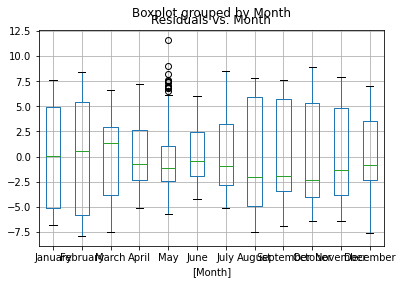

In [18]:
#creating box plot for residuals vs. Month
fig = plt.figure(figsize =(20, 7))

box = pd.DataFrame(new_df['Month'])
box['Residual'] = resid_y
box.boxplot(by='Month')

# displaying the title
plt.title("Residuals vs. Month")
# show plot
plt.show()

<Figure size 1440x504 with 0 Axes>

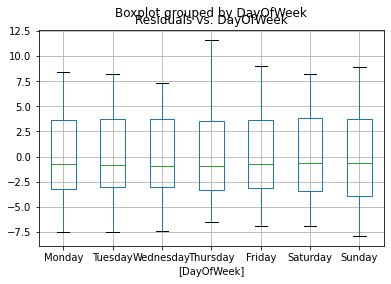

In [19]:
#creating box plot for residuals vs. DayOfWeek
fig = plt.figure(figsize =(20, 7))

box = pd.DataFrame(new_df['DayOfWeek'])
box['Residual'] = resid_y
box.boxplot(by='DayOfWeek')

# displaying the title
plt.title("Residuals vs. DayOfWeek")
 
# show plot
plt.show()

### b)	(10 points). Calculate the Anderson-Darling Test statistic and generate a Normality Q-Q Plot for the residuals.  Comment on the evidence of normality (or non-normality) of the residuals.

In [20]:
y_new = pd.Series(resid_y * resid_y, name = 'Square_Residual')
n_obs = len(y_new)
y_new

0      1.6890861e+00
1      1.5997188e+01
2      1.4480797e+00
3      3.0286991e+01
4      9.2449047e-04
            ...     
1039   4.5487240e+01
1040   1.9134258e+01
1041   8.2828017e+00
1042   7.8681894e+00
1043   1.4410558e+00
Name: Square_Residual, Length: 1044, dtype: float64

In [21]:
# Tests of Normality
from scipy.stats import shapiro, anderson


anderson_test = anderson(resid_y, dist = 'norm')
print('  Anderson Test = ', anderson_test[0])
print('Critical Values = ', anderson_test[1])
print('       p-values = ', anderson_test[2]/100.0)

  Anderson Test =  15.636691540376887
Critical Values =  [0.574 0.654 0.784 0.915 1.088]
       p-values =  [0.15  0.1   0.05  0.025 0.01 ]


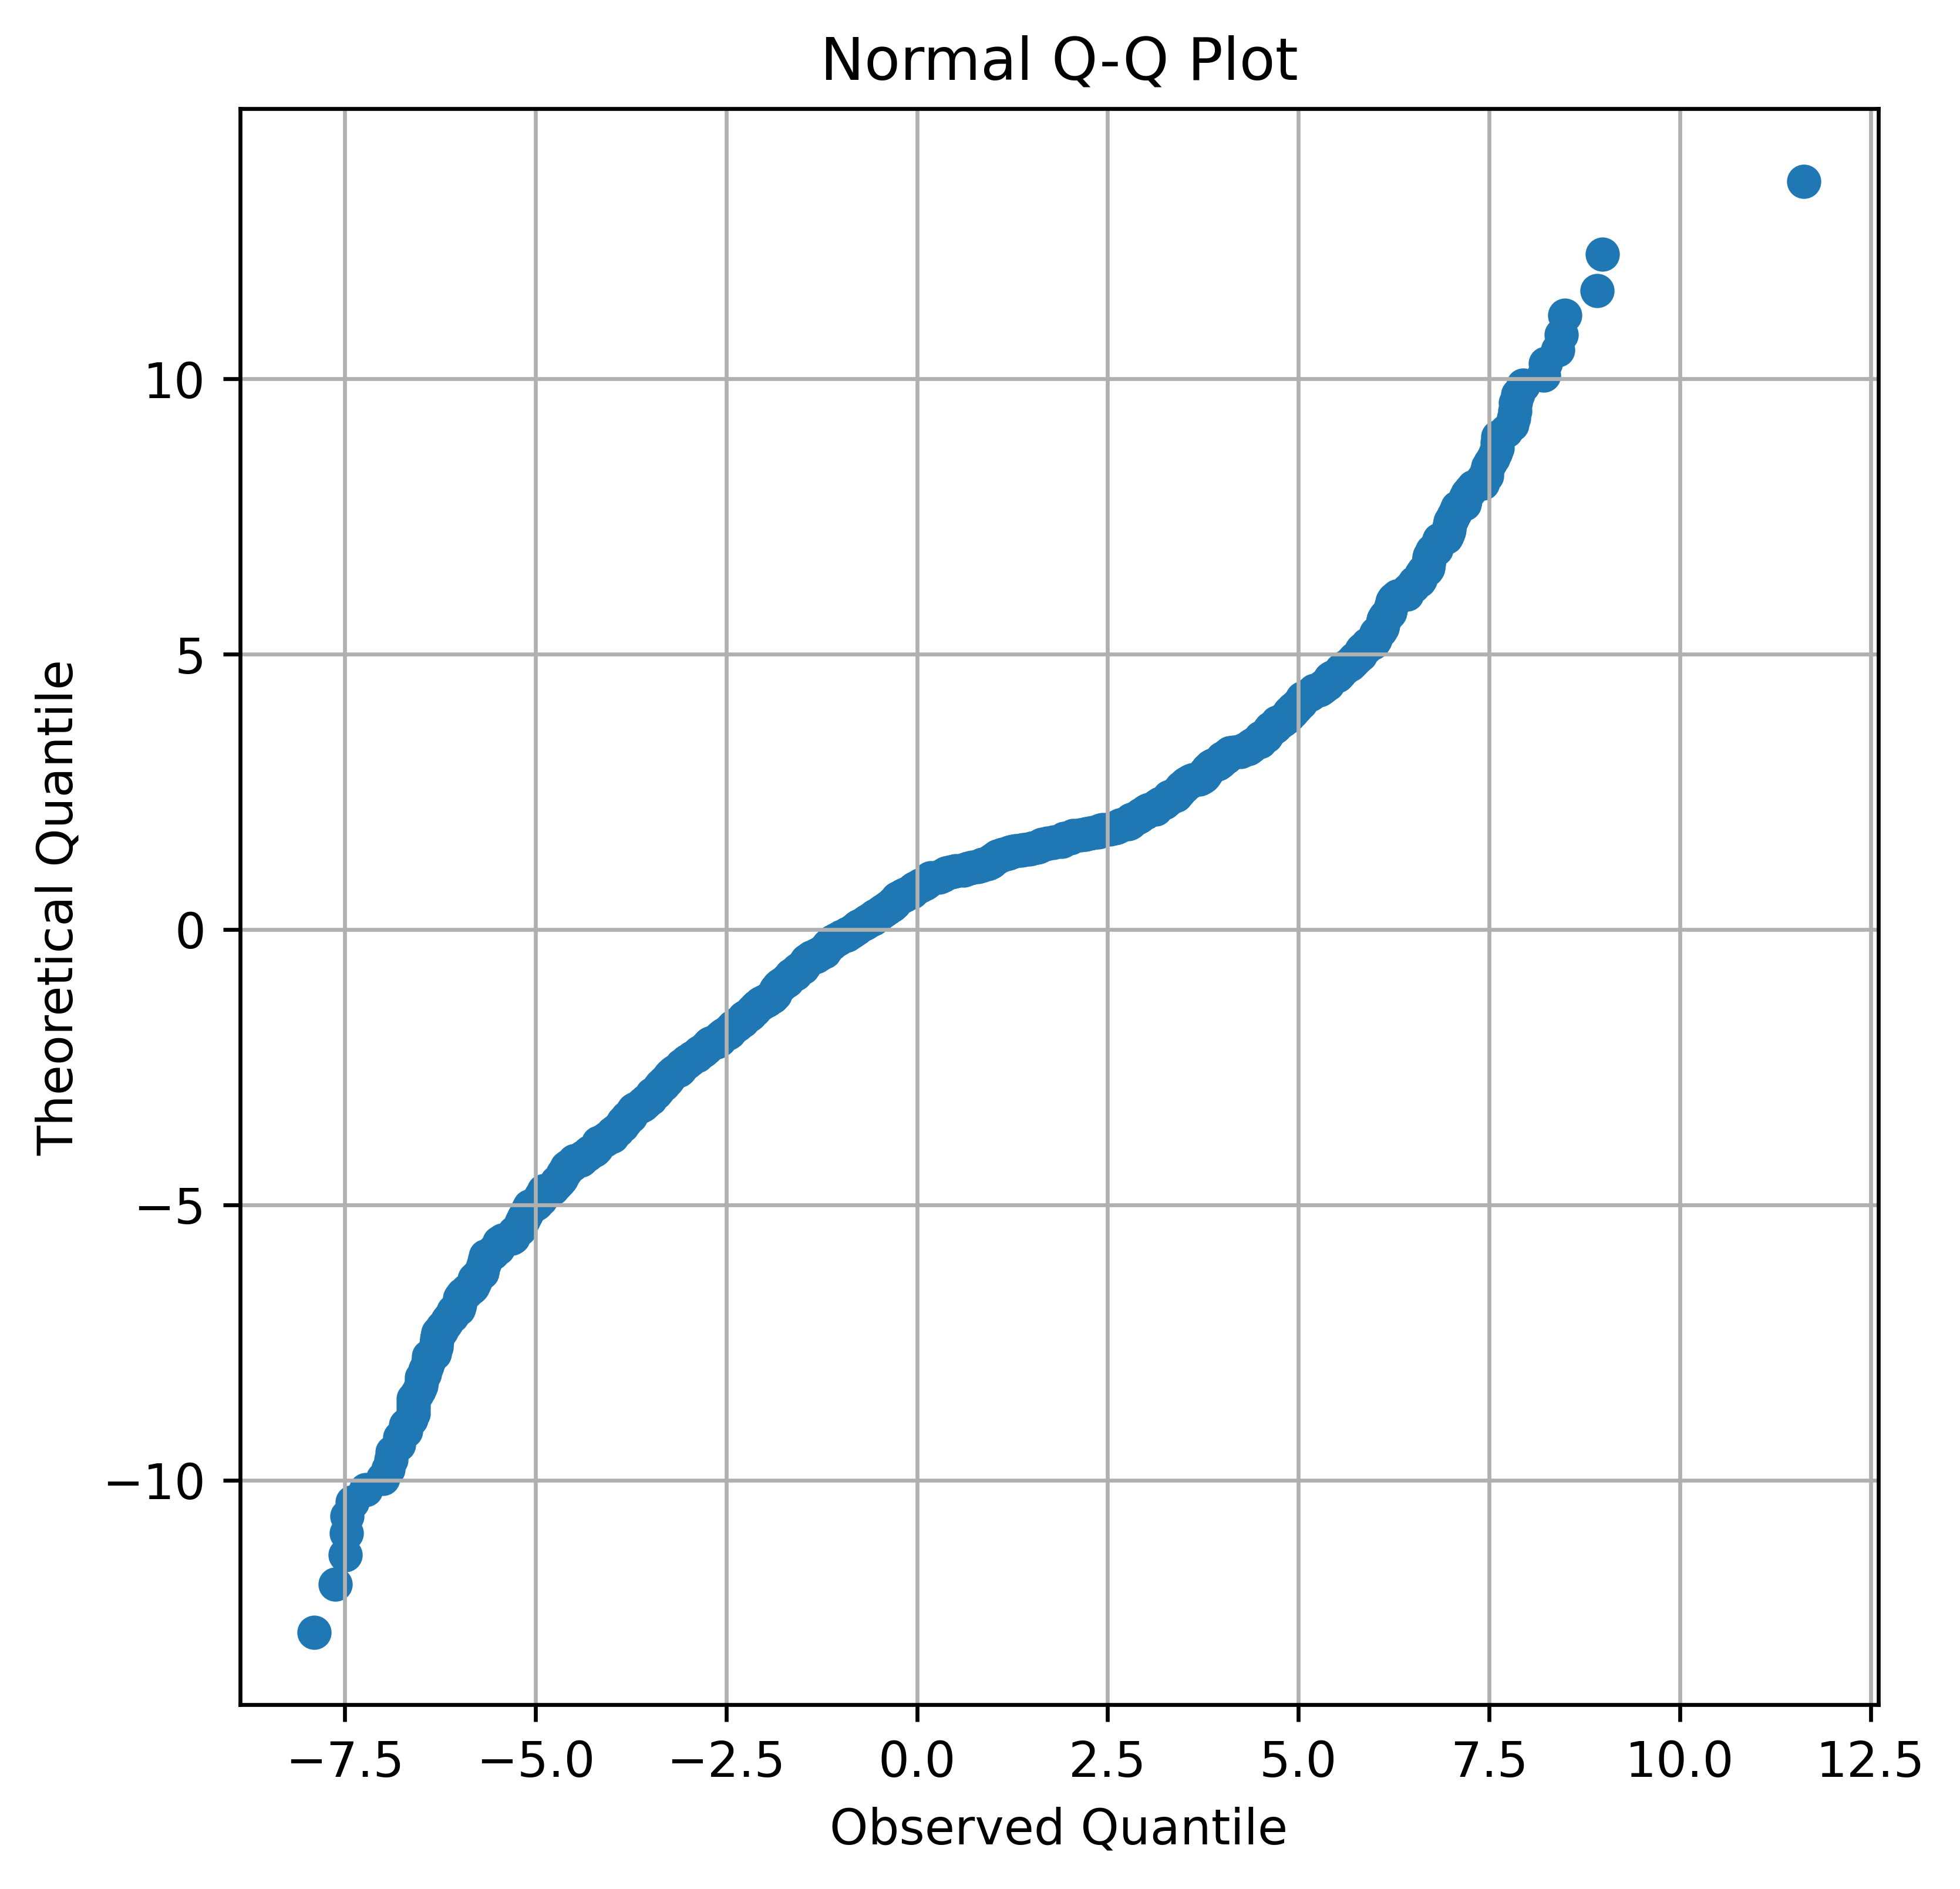

In [22]:
# Normal Q-Q Plot
obs_quantile = numpy.sort(resid_y)
z_p = numpy.array(range(n_obs))
z_p = (1.0 + z_p) / (n_obs + 0.5)
z_quantile = norm.ppf(z_p, loc = numpy.mean(obs_quantile), scale = numpy.std(obs_quantile))

fig, ax00 = plt.subplots(1, 1, dpi = 600, figsize = (6,6))
ax00.scatter(obs_quantile, z_quantile)
ax00.set_title('Normal Q-Q Plot')
ax00.set_xlabel('Observed Quantile')
ax00.set_ylabel('Theoretical Quantile')
#ax00.axline((0,0), slope = 1, color = 'red', linestyle = '--')
ax00.grid(axis = 'both')
plt.show()

From the plot we can see that there are spikes of identical values, and they are a little utlides in some quantiles which states that the plot is light tailed on both sides. However, most parts of the plot still follows the shape of normal distribution. 

### c)	(10 points). Perform the Breusch-Pagan Test and the White Test of Heteroskedasticity.  Provide the Chi-square statistics, the degrees of freedom, and the significance values.  Comment on the evidence of non-homogenous variance.

In [23]:
# Breusch-Pagan Test of Homoskedasticity
y_new = pd.Series(resid_y * resid_y, name = 'Square_Residual')
n_obs = len(y_new)

b, SSE0, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X4[['Intercept']], y_new)
b, SSE1, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X4, y_new)

r_squared = 1.0 - (SSE1 / SSE0)
breusch_test = n_obs * r_squared
breusch_df = len(nonAliasParam) - 1
breusch_pvalue = chi2.sf(breusch_test, breusch_df)

#print results
print('Breusch-Pagan Test:')
print('Chi-square statistics: ',breusch_test)
print('Degrees of freedom: ',breusch_df)
print('Significance values: ',breusch_pvalue)

Breusch-Pagan Test:
Chi-square statistics:  209.35170433061657
Degrees of freedom:  17
Significance values:  3.745074586000889e-35


In [24]:
# White Test of Homoskedasticity
X_new   = X4.copy()
X_new

newMonth = X_new.columns[1:13]
newDay   = X_new.columns[14:]

for i in newMonth:
    for j in newDay:
        u = pd.DataFrame(X4[i] * X4[j])
        u.columns = [i+j]
        X_new = X_new.join(u)
        
        
b, SSE0, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X_new[['Intercept']], y_new)
b, SSE1, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X_new, y_new)

r_squared = 1.0 - (SSE1 / SSE0)

white_test = n_obs * r_squared
white_df = len(nonAliasParam) - 1
white_pvalue = chi2.sf(white_test, white_df)

#print results
print('White Test of Heteroskedasticity:')
print('Chi-square statistics: ',white_test)
print('Degrees of freedom: ',white_df)
print('Significance values: ',white_pvalue)

White Test of Heteroskedasticity:
Chi-square statistics:  235.55502018506408
Degrees of freedom:  83
Significance values:  1.5537169739820005e-16


Comment on the evidence of non-homogenous variance: 

Both tests have very small p-value, which indicated that they both have a high level of heteroskedasticity. 

### d)	(10 points). Calculate the Durbin-Watson Test statistic.  Comment on the evidence of autocorrelation among observations.

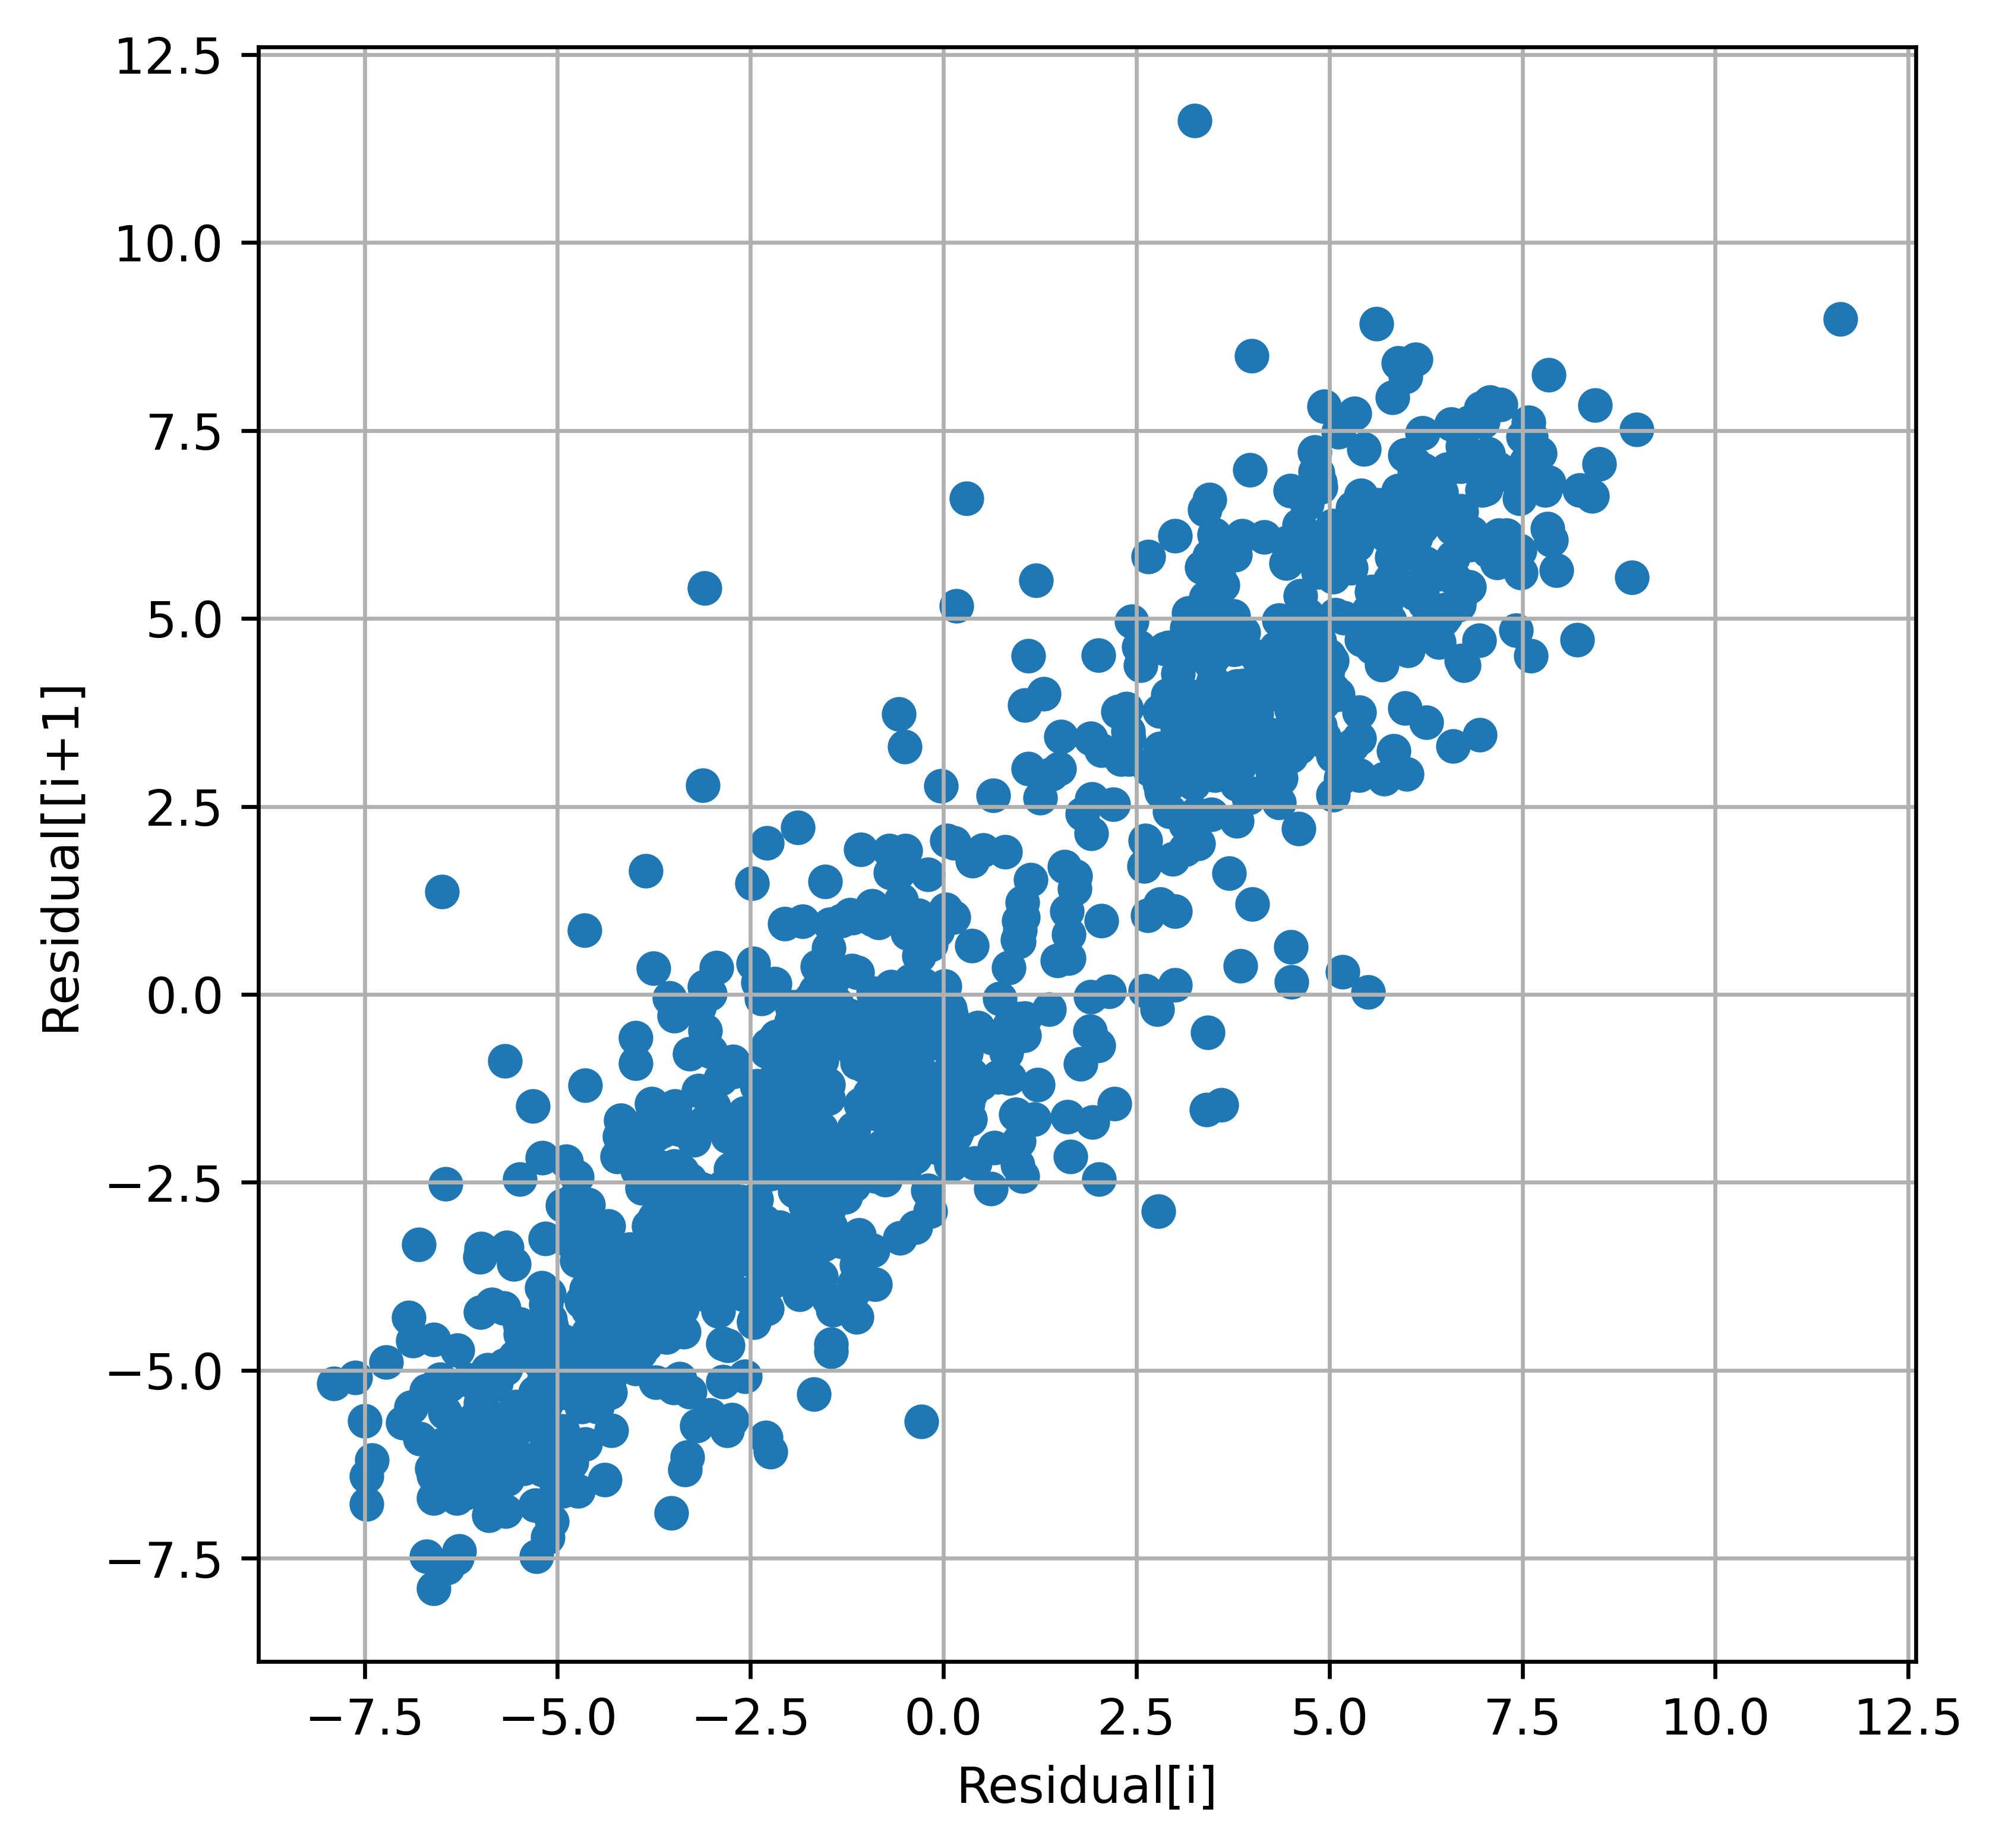

Autocorrelation =  0.91995390860784
Durbin-Watson Test 0.16007798648747495


In [25]:
# Durbin-Watson Test of Autocorrelation
z1 = resid_y[0:(n_obs-1)].to_numpy()
z2 = resid_y[1:n_obs].to_numpy()

fig, ax00 = plt.subplots(1, 1, dpi = 600, figsize = (6,6))
ax00.scatter(z1, z2)
ax00.set_xlabel('Residual[i]')
ax00.set_ylabel('Residual[[i+1]')
ax00.grid(axis = 'both')
plt.show()

z12_corr = numpy.corrcoef(z1, z2)
print('Autocorrelation = ', z12_corr[0,1])

durbin_watson_test = numpy.sum((z1-z2)**2) / numpy.sum(resid_y**2)
print('Durbin-Watson Test', durbin_watson_test)

Comment on the evidence of autocorrelation among observations:

The autocirrelation value of 0.92 shows high and positive correlation among observations. In additin, the result from Durbin-Watson test of 0.16 also indicates the same conclusion. 

### e)	(10 points). Calculate the Shapley values of the two predictors Month and DayOfWeek.  Also, provide the Percent Shapley values of the two predictors.  Among these two predictors, which one influence the weight more?

The following code is inspired by Chuyang Chen's solution.

In [26]:
## Full model: Weight ~ Intercept + Month + DayOfWeek
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X4, y)
pred_y = numpy.matmul(X4.to_numpy(), b)
true_y = y.copy()
month_day = r2_score(true_y, pred_y)
month_day

0.20995596440365605

In [27]:
## Weight ~ Intercept + Month
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X1, y)
pred_y = numpy.matmul(X1.to_numpy(), b)
true_y = y.copy()
month = r2_score(true_y, pred_y)
month

0.20501468151533875

In [28]:
## Weight ~ Intercept + Day
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X2, y)
pred_y = numpy.matmul(X2.to_numpy(), b)
true_y = y.copy()
day = r2_score(true_y, pred_y)
day

0.005414034614362295

In [29]:
# explain the model's predictions using SHAP
rSquaredTable = {'Model': ['Intercept',
               'Intercept + Month',
               'Intercept + Day',
               'Intercept + Month + Day '], 
     'R^2':[0,month,day,month_day]}
table = pd.DataFrame(data=rSquaredTable)
table

,Model,R^2
0,Intercept,0.0000000e+00
1,Intercept + Month,2.0501468e-01
2,Intercept + Day,5.4140346e-03
3,Intercept + Month + Day,2.0995596e-01


In [30]:
CoalitionTable = {'Coalition': ['(M,D)','(D,M)'],
          'Predictor 1':[month, day],
          'Predictor 2':[month_day, month_day] }
table2 = pd.DataFrame(data = CoalitionTable)
table2

,Coalition,Predictor 1,Predictor 2
0,"(M,D)",2.0501468e-01,2.0995596e-01
1,"(D,M)",5.4140346e-03,2.0995596e-01


In [31]:
contri ={'Month':[month,(month_day - day)], 
     'Day':[(month_day - month),day]}
contribution = pd.DataFrame(data = contri)
contribution

,Month,Day
0,2.0501468e-01,4.9412829e-03
1,2.0454193e-01,5.4140346e-03


In [32]:
final = {'Predictor': ['Month','DayOfWeek'], 
      'Shapley Value': [numpy.mean(contribution['Month']),numpy.mean(contribution['Day'])], 
      'Percent Shapley Value': [ numpy.mean(contribution['Month']) / 
                                (numpy.mean(contribution['Month'])+                 
                                 numpy.mean(contribution['Day']))*100, 
                                numpy.mean(contribution['Day'])/
                                (numpy.mean(contribution['Month'])+
                                 numpy.mean(contribution['Day']))*100 ]}
shapley = pd.DataFrame(data=final)
shapley

,Predictor,Shapley Value,Percent Shapley Value
0,Month,2.0477831e-01,9.7533931e+01
1,DayOfWeek,5.1776588e-03,2.4660689e+00


In conclusion, we can see that Month influence the weight more than DayOfWeek.